In [1]:
import os
cwd = os.getcwd()
print (cwd)

C:\Users\Atique


In [2]:
import pandas as pd
data = pd.read_csv(r"Documents\\transcripts.csv")


In [3]:
data.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [4]:
len(data)

2467

Now we have transcripts of Ted talks and its URL, Next I would try to get headings from url

In [5]:
data['title']= data['url'].map(lambda x:x.split("/")[-1])
data.head()

,transcript,url,title
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,ken_robinson_says_schools_kill_creativity\n
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,al_gore_on_averting_climate_crisis\n
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,david_pogue_says_simplicity_sells\n
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,majora_carter_s_tale_of_urban_renewal\n
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,hans_rosling_shows_the_best_stats_you_ve_ever_...


My eventual goal is to use the text in the transcript column to create a measure of similarity. And then recommend the 4 most similar titles to a given talk. 

In order to achieve that I have to

    1) Create a vector representation of each transcript
    2) Create similarity matrix
    3) Based on similarity matrix select 4 most similar talks

In [6]:
from sklearn.feature_extraction import text
d_text = data['transcript'].tolist()
tfidf = text.TfidfVectorizer(input=d_text, stop_words="english")
matrix =tfidf.fit_transform(d_text)
print(matrix)


  (0, 22442)	0.0207893511919
  (0, 34082)	0.0130546957013
  (0, 29661)	0.255170755522
  (0, 22767)	0.0236033537079
  (0, 23769)	0.0175912125136
  (0, 55708)	0.0410919991987
  (0, 6739)	0.0226749608268
  (0, 4664)	0.0172796410847
  (0, 52365)	0.0391744083742
  (0, 19074)	0.0236033537079
  (0, 29839)	0.0342704231208
  (0, 52271)	0.0258707093722
  (0, 45069)	0.0269777561086
  (0, 11459)	0.0344556338103
  (0, 43367)	0.0198370462907
  (0, 56576)	0.056001182117
  (0, 51448)	0.0237987468233
  (0, 18924)	0.064560386938
  (0, 18427)	0.0302459607493
  (0, 25126)	0.0600700206546
  (0, 12663)	0.092792550292
  (0, 40610)	0.0544446170392
  (0, 38539)	0.0892785628888
  (0, 28351)	0.0425645817722
  (0, 55654)	0.0191398725325
  :	:
  (2466, 42500)	0.0772609092427
  (2466, 23266)	0.0377482266057
  (2466, 37094)	0.0367370920802
  (2466, 12658)	0.0959228679653
  (2466, 14324)	0.0515142172579
  (2466, 40147)	0.042453664438
  (2466, 39520)	0.0468087794255
  (2466, 16106)	0.0752591175889
  (2466, 12554)	0.04

Now what does this matrix imply

Assume general form: (A,B) C

A: Document index B: Specific word-vector index C: TFIDF score for word B in document A

This is a sparse matrix. It indicates the tfidf score for all non-zero values in the word vector for each document.

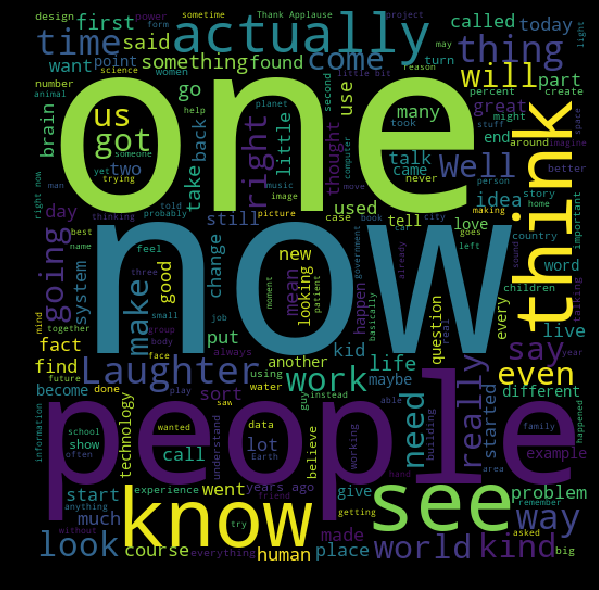

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
d1_text=''.join(list(d_text))
word=WordCloud(width=512,height=512).generate(d1_text)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(word)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Making a wordcloud to analyze popular words among transcripts

In [17]:
import numpy as np
indices = np.argsort(tfidf.idf_)[::-1]
features = tfidf.get_feature_names()
top_n = 5
top_features = [features[i] for i in indices[:top_n]]
print (top_features)

['送你葱', 'multipotentiality', 'chestnuts', 'multimedial', 'multimodal']


By changing the value of n, we can get top n features

To find out similar documents among different documents, we will need to compute a measure of similarity. Usually when dealing with Tf-Idf vectors, we use cosine similarity. 

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(matrix)

now for each Transcript, find out the 4 most similar ones, based on cosine similarity. Algorithmically, this would amount to finding out, for each row in the cosine matrix constructed above, the index of five columns, that are most similar to the document (transcript in our case) corresponding to the respective row number.

In [23]:
def get_similar_articles(x):
    return ",".join(data['title'].loc[x.argsort()[-5:-1]])
data['similar_articles']=[get_similar_articles(x) for x in sim]

In [24]:
data['title'].str.replace("_"," ").str.upper().str.strip()[10]

'CAMERON SINCLAIR ON OPEN SOURCE ARCHITECTURE'

In the above code we replaced _ in the title with spaces and converted it to upper case

Let's pickup any title and see our recommendations,Here we are picking 10th title

In [26]:
data['similar_articles'].str.replace("_"," ").str.upper().str.strip().str.split("\n")[9]

['RICARDO SEMLER HOW TO RUN A COMPANY WITH ALMOST NO RULES',
 ',TONY ROBBINS ASKS WHY WE DO WHAT WE DO',
 ',DAN DENNETT S RESPONSE TO RICK WARREN',
 ',TOM HONEY ON GOD AND THE TSUNAMI']